<a href="https://colab.research.google.com/github/Martinccv/Imagenes-PBI/blob/main/Introducci%C3%B3n_a_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning

Vimos que dentro de aprendizaje supervisado tenemos problemas de clasificación y de regresión.

En este notebook vamos a comenzar trabajando con un problema de clasificación.

Vamos a armar datasets sintéticos de 2 features y 2 clases. Luego, trataremos de aprender a clasificarlo utilizando árboles de decisión.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Generamos un dataset sintético:

In [ ]:
#!pip install sklearn

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1.3)

In [ ]:
X

array([[0.31372224, 3.73429074],
       [3.40409547, 3.03332608],
       [0.5016983 , 1.97506151],
       ...,
       [2.09135829, 0.34445878],
       [1.58163125, 2.30667054],
       [1.61813439, 4.15285221]])

In [ ]:
y

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,

Lo graficamos utilizando como hue la clase a la que pertenece el punto:

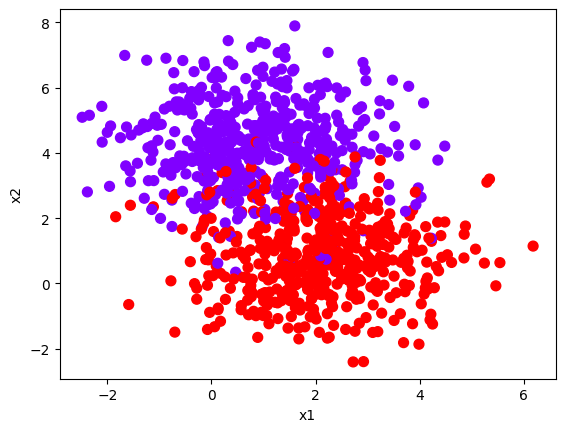

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Para aprender clasificar estos puntos, vamos a utilizar un DecisionTreeClassifier de sklearn.

Como vimos en temas anteriores, sklearn tiene muchos módulos. Uno de ellos es tree que es donde vamos a encontrar el DecisionTreeClassifier.

Primero que nada, tenemos que instanciar un decision tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)

Al igual que los Imputers o Encoders que vimos anteriormente, el decision tree tiene un método fit. Este método fit nos sirve para entrenar el modelo.

Al ser un problema de aprendizaje supervisado, tenemos X e y:

In [ ]:
tree.fit(X, y)

DecisionTreeClassifier(max_depth=5)

La siguiente función, nos permite ver de forma gráfica el dominio de decision que toma nuestro arbol entrenado.

No es necesario prestar atención a la función ni entender el código en este caso. Simplemente la usaremos para graficar:

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

<ipython-input-9-40cc24e3be36>:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


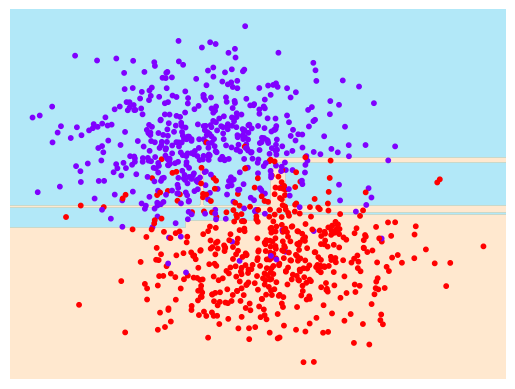

In [ ]:
visualize_classifier(tree, X, y)

En este caso, podemos ver que los puntos rojos que están sobre el fondo rojo, son los que nuestro modelo clasifico correctamente. Lo mismo con los puntos azules sobre fondo azul.

Por otro lado, los puntos de un color con fondo de otro color, son puntos mal clasificados.

En la práctica, no va a ser simple visualizar los puntos de esta manera, ya que vamos a tener multiples features y no vamos a poder graficar. Esto es un ejemplo simple con datos sintéticos.

Los modelos siempre van a tener algún porcentaje de error. Si queremos medir el porcentaje de puntos que clasificamos bien, podemos utilizar el método predict de el decision tree (que nos genera predicciones, sobre valores de X predice y) y medir la métrica accuracy score de sklearn.

Para medir accuracy score, necesitamos tener los valores reales de "y" y los que predijo nuestro modelo.

In [ ]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y,y_pred)

0.932

El 90% de los datos fueron clasificados de forma correcta.

Trabajemos con un problema más real...

# Ejercicio

Vamos a trabajar con el dataset de titanic, para predecir si un pasajero sobrevivió o no.

1) Leer el dataset titanic.csv que está en clase 16

In [ ]:
# COMPLETAR
df = pd.read_csv('titanic.csv')

2) Queremos predecir si un pasajero sobrevive o no.
¿ Cuál sería nuestro "X" o features? ¿Y nuestro "y" o target?

In [ ]:
# Completar
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#defino la variable target
y = df.Survived

In [ ]:
X = df.copy()
X = X.drop('Survived', axis=1)

3) ¿ Cuántas filas tiene el dataset?

In [ ]:
# Completar
df.shape

(891, 12)

4) ¿Hay nulos?

In [ ]:
# Completar
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

5) Hay columnas, que a simple vista podemos darnos cuenta que no nos sirven para predecir si un pasajero sobrevivió o no. Por ejemplo, piensan que el nombre de un pasajero puede influir en algo? Ids?

Descartar todas estas columnas.

Para no modificar el dataset original, creemos una copia antes de hacerlo y a partir de este punto trabajemos sobre la copia.

In [ ]:
# Completar
df_clean = df.copy()

In [ ]:
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


6) Ahora que eliminamos columnas que no nos sirven, volvamos a ver en que columnas nos quedaron nulos (en valor absoluto y en porcentaje)

In [ ]:
df_clean["Embarked"]=df_clean["Embarked"].dropna()

In [ ]:


# Ejemplo de imputación (relleno) de valores faltantes
df_clean['Age'].fillna(df['Age'].median(), inplace=True)

# Eliminación de columnas con muchos valores faltantes o irrelevantes
df_clean.drop(columns=['Cabin', 'Ticket',"Name","PassengerId"], inplace=True)
# Verifica valores faltantes
print(df_clean.isnull().sum())

KeyError: "['Cabin', 'Ticket', 'Name', 'PassengerId'] not found in axis"

In [ ]:
df_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_clean= df_clean.dropna()

7) Ahora, como vamos a usar estos datos para entrenar un modelo de machine learning que no acepta nulos, debemos completar los valores faltantes o descartar las instancias con faltantes. Tomar una decision y ejecutarlo:

In [ ]:
# Ejemplo de codificación one-hot para la columna 'Embarked'
df_clean= pd.get_dummies(df_clean, columns=['Embarked', 'Sex'], drop_first=True)

In [ ]:
df_clean

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,False,True,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False
3,1,1,35.0,1,0,53.1000,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,True
887,1,1,19.0,0,0,30.0000,False,True,False
888,0,3,28.0,1,2,23.4500,False,True,False
889,1,1,26.0,0,0,30.0000,False,False,True


8) Tenemos features que sean categóricas? Recuerden que un modelo de machine learning no entiene que significa "male" o "female". Por lo tanto, tenemos que aplicar algún encoder a estos datos.

Listar las variables categóricas y aplicarles el encoder que mejor se ajuste según su criterio:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifica las columnas numéricas
numeric_features = ['Age', 'Fare']
scaler = StandardScaler()
df_clean[numeric_features] = scaler.fit_transform(df_clean[numeric_features])

In [ ]:
X = df_clean.drop(columns=['Survived'])
y = df_clean['Survived']

9) ¿Alguna de las features tiene outliers? En caso de ver outliers, tomar alguna desición con lo que sabemos para limpiarlos. Una opción puede ser simplemente descartar estas observaciones.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

10) Ahora que tenemos nuestros datos más limpios, tenemos que analizar los datos para ver que features pueden ayudarnos a predecir si un pasajero sobrevivió o no. (Empezamos la etapa de EDA del proyecto)

Primero que nada queremos saber como están distribuidas las clases que queremos predecir. ¿ Qué porcentaje de pasajeros sobrevivió ?

Graficar con un countplot y luego hacer un value counts.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7921348314606742
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       105
           1       0.80      0.66      0.72        73

    accuracy                           0.79       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



Siempre que vayamos a entrenar un modelo de machine learning, tenemos que tomar como punto de partida lo que se conoce como un "baseline". Un baseline, sería buscar una solución simple al problema sin gastarnos en hacer ningún modelo predictivo o alguna solución compleja. Por ejemplo, sabiendo que la mayor parte de los pasajeros no sobrevivieron, nuestro baseline podría ser predecir siempre 0. De esta forma, el accuracy score que obtendríamos sería igual al porcentaje de no sobrevivientes.

Luego, entrenaremos nuestro modelo y compararemos el accuracy score del modelo contra el del baseline. De esta forma, podemos comparar nuestro modelo contra algo para tomar una dimensión de lo que significa la métrica que obtenemos.

Si nuestro accuracy score es > a el porcentaje de pasajeros que murieron, podemos decir que nuestro modelo es al menos aceptable. Si nuestro modelo obtiene un score peor a ese, quiere decir que no sirve y sería mejor predecir siempre 0.

11) Plotear la correlación entre las variables. Que el gráfico sea simple de ver (buen tamaño, anotado, solo la diagonal de abajo, etc).

¿Hay alguna correlación que ya se esperaban ver? ¿Alguna correlación sin sentido?





In [ ]:
# COMPLETAR

12) ¿ Qué variables tomarían para la primer versión de el modelo ?
Si necesitan graficar o investigar algo más para decidir, haganlo.

Ahora, selecciones UNICAMENTE 2 de esas variables y estas van a ser las que utilicemos para entrenar el primer modelo.

Guardar en una variable llamada X una copia de las columnas del dataset que utilizaremos como X (las 2 features que usaremos para predecir).

In [ ]:
# COMPLETAR

13) Guardar en una variable llamada y, nuestro target (survived)

In [ ]:
# COMPLETAR

14) Ahora que tenemos X e y, podemos definir nuestro decision tree classifier y entrenarlo. Entrenar el clasificador:

In [ ]:
# COMPLETAR

15) Ahora, con nuestro modelo entrenado, generar las predicciones sobre el X que generamos anteriormente:

In [ ]:
# COMPLETAR

16) ¿Qué accuracy score obtenemos? Recuerden que tienen los valores reales de y almacenados en la variable "y" y también tienen lo que predijeron en el punto anterior. Utilizando la función accuracy_score de sklearn pueden obtener la métrica.

In [ ]:
# COMPLETAR

17) Ahora, vuelvan a entrenar el modelo, pero utilizando un nuevo X que contenga TODAS las features que les parezcan relevantes (pueden ser todas las del dataset).

In [ ]:
# COMPLETAR

18) Medir el accuracy score de este modelo entrenado con todas las variables. ¿Ven alguna mejora?

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el archivo CSV
df = pd.read_csv('titanic.csv')

# Mostrar las primeras filas y la información general
print(df.head())
print(df.info())

# Eliminar columnas 'PassengerId' y 'Name'
df.drop(columns=['Cabin', 'Ticket',"Name","PassengerId"], inplace=True)

# Eliminar filas con valores nulos en la columna 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)

# Manejar valores faltantes en otras columnas
df['Age'].fillna(df['Age'].median(), inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, columns=['Embarked', 'Sex'], drop_first=True)

# Escalado de características numéricas
numeric_features = ['Age', 'Fare']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Separar características y variable objetivo
X = df.drop(columns=['Survived'])
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Entrenar un modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42,max_depth=5)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c